<a href="https://colab.research.google.com/github/ChiUzonwa/Acitivy-1/blob/main/EGSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd

In [4]:
egss= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_for_UCI_named.csv')

In [5]:
egss.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [6]:
egss.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [7]:
egss.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [8]:
egss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [9]:
import numpy as np

In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [12]:
%matplotlib inline

In [13]:
from sklearn.linear_model import LogisticRegression

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier

In [15]:
from sklearn.model_selection import train_test_split


In [39]:
!pip install lightgbm

In [45]:
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeClassifier


In [18]:
corr_mat=egss.corr()

<ipython-input-18-87a05ed4baa7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=egss.corr()


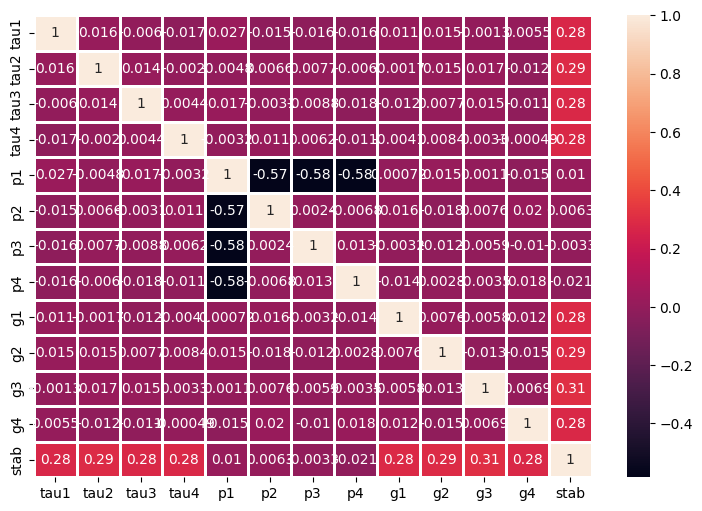

In [19]:
fig,ax= plt.subplots(figsize=(9,6))
ax=sns.heatmap(corr_mat,
               linewidths=1.0,
               annot=True)

In [20]:
egss.shape

(10000, 14)

In [21]:
egss['stabf'].unique()

array(['unstable', 'stable'], dtype=object)

In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [23]:
cate_col= egss.select_dtypes(include=['object','category']).columns
num_cols= [col for col in egss.columns if col not in cate_col]
print (cate_col)

Index(['stabf'], dtype='object')


In [24]:
le= LabelEncoder()
for i in cate_col:
  egss[i]= le.fit_transform(egss[i])

In [25]:
egss.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,1


In [33]:
egss.drop(columns=['stab'])

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,1
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,0
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,0
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,1


In [26]:
#splitting data into x and y

In [27]:
x= egss.drop('stabf', axis=1)
y= egss['stabf']

In [28]:
#splitting into train and test set

In [29]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=1)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 13), (2000, 13), (8000,), (2000,))

In [62]:
from lightgbm.dask import LGBMModel
models= {'Random Forest': RandomForestClassifier(),
         'Extra trees': ExtraTreeClassifier(),
         'xgboost': XGBRegressor()}


In [58]:
def fit_and_score(models,ltb,x_train,y_train,x_test,y_test): np.random.seed=1

In [63]:
model_scores={}

for name, model in models.items():
  model.fit (x_train,y_train)
  model_scores[name]= model.score(x_test,y_test)

  print(model_scores)


{'Random Forest': 0.9995}
{'Random Forest': 0.9995, 'Extra trees': 0.9145}
{'Random Forest': 0.9995, 'Extra trees': 0.9145, 'xgboost': 0.997819170412152}


In [65]:
from lightgbm import LGBMClassifier
lgb= LGBMClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(pred)

[9.9999177e-01 9.9999177e-01 1.4402863e-05 ... 1.4402863e-05 9.9999177e-01
 9.9999177e-01]


In [66]:
accuracy=model.score(x_test,y_test)
accuracy

0.997819170412152

In [ ]:
%%time
scores

In [56]:
scaler= StandardScaler()
x_train_scaled= scaler.fit_transform (x_train)
x_test_scaled= scaler.transform(x_test)